In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

In [2]:
df=pd.read_csv('SalesRegister.csv')

In [3]:
df.head()

,Date,Vch/Bill No,Particulars,Item Details,Qty.,Unit,Price,Amount
0,01-08-2023,1691.0,Cash,PUTTY J K 20KG,6.0,Pcs.,380.0,2280.0
1,01-08-2023,NaN,NaN,TARPIN 1LT,3.0,Pcs.,130.0,390.0
2,01-08-2023,NaN,NaN,DHOTI,4.0,Pcs.,20.0,80.0
3,01-08-2023,NaN,NaN,"ROLLER FOAM ASIAN 6""",3.0,Pcs.,50.0,150.0
4,01-08-2023,NaN,NaN,MACHINE COLOURENT,0.1,LT,1000.0,100.0


# Data Cleaning

In [4]:
#dropping unnecessary columns
c=['Vch/Bill No','Particulars']
df=df.drop(columns=c, axis=1)

In [5]:
df.tail(10)

,Date,Item Details,Qty.,Unit,Price,Amount
2044,30-08-2023,RODI,1.0,Pcs.,380.00,380.0
2045,30-08-2023,RET,0.3,Pcs.,333.33,100.0
2046,30-08-2023,CEMENT J K L PRO +,2.0,BAG,380.00,760.0
2047,30-08-2023,BADARPUR,2.0,Pcs.,360.00,720.0
2048,30-08-2023,BADARPUR,6.0,Pcs.,300.00,1800.0
2049,30-08-2023,NaN,NaN,NaN,NaN,NaN
2050,30-08-2023,NaN,NaN,NaN,NaN,NaN
2051,30-08-2023,NaN,NaN,NaN,NaN,NaN
2052,30-08-2023,NaN,NaN,NaN,NaN,NaN
2053,30-08-2023,NaN,NaN,NaN,NaN,NaN


In [6]:
#handling missing values
df.isnull().sum()

Date            0
Item Details    5
Qty.            5
Unit            5
Price           5
Amount          5
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Date            0
Item Details    0
Qty.            0
Unit            0
Price           0
Amount          0
dtype: int64

In [9]:
df.head()

,Date,Item Details,Qty.,Unit,Price,Amount
0,01-08-2023,PUTTY J K 20KG,6.0,Pcs.,380.0,2280.0
1,01-08-2023,TARPIN 1LT,3.0,Pcs.,130.0,390.0
2,01-08-2023,DHOTI,4.0,Pcs.,20.0,80.0
3,01-08-2023,"ROLLER FOAM ASIAN 6""",3.0,Pcs.,50.0,150.0
4,01-08-2023,MACHINE COLOURENT,0.1,LT,1000.0,100.0


# Data Analysis

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Qty.,2049.0,19.110361,104.310002,0.0,1.0,1.0,2.0,2000.0
Price,2049.0,238.036999,485.684207,0.0,20.0,100.0,360.0,7300.0
Amount,2049.0,508.324061,1184.956367,0.0,45.0,150.0,385.0,28125.0


In [11]:
np.shape(df)

(2049, 6)

In [12]:
df['Item Details'].value_counts()

Item Details
BADARPUR                        166
CEMENT J K L PRO +              151
CEMENT LOOSE                     90
BRICK GBC                        73
RET                              48
                               ... 
BLADE SINGLE                      1
BASULI                            1
CONNECTION PIPE 18"               1
TB 3 BLADE STONE CUTTER 5"        1
141 BIB COCK LONG BODY ARTHA      1
Name: count, Length: 485, dtype: int64

In [13]:
unique_item_details_counts = df['Item Details'].value_counts()

# Print all unique values and their counts
for item, count in unique_item_details_counts.items():
    print(f"Item: {item}, Count: {count}")

Item: BADARPUR, Count: 166
Item: CEMENT J K L PRO +, Count: 151
Item: CEMENT LOOSE, Count: 90
Item: BRICK GBC, Count: 73
Item: RET, Count: 48
Item: DHOTI, Count: 41
Item: POP 2KG, Count: 37
Item: RODI, Count: 35
Item: CEMENT AMBUJA, Count: 35
Item: JK WHITE CEMENT 1KG, Count: 34
Item: PUTTY J K 20KG, Count: 30
Item: CEMENT JKL PPC, Count: 28
Item: REGMARG W P 150, Count: 27
Item: TARPIN 1LT, Count: 25
Item: PUTTY TRIMURTY EXPERT- 20KG, Count: 22
Item: TILES, Count: 18
Item: PUTTY J K 5KG, Count: 18
Item: BLADE IRON CUTTER, Count: 17
Item: CEMENT SHRI JANGRODHAK, Count: 17
Item: TARPIN 500ML, Count: 17
Item: BRICK A - N, Count: 17
Item: PUTTY J K 1KG, Count: 16
Item: APCO ENAM BROWN 1LT, Count: 15
Item: M-SEAL 25GM, Count: 13
Item: REGMARG W P 220, Count: 13
Item: M-SEAL 60GM, Count: 12
Item: PATRA 4-6", Count: 12
Item: CPVC SOCCET 3/4", Count: 11
Item: APCO STAINER FAST VIOLET 50ML, Count: 11
Item: JK WHITE CEMENT 5KG, Count: 10
Item: 1000  BOND KING 10ML, Count: 10
Item: RASHI PED, Co

In [14]:
# Adjusting the format here
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  

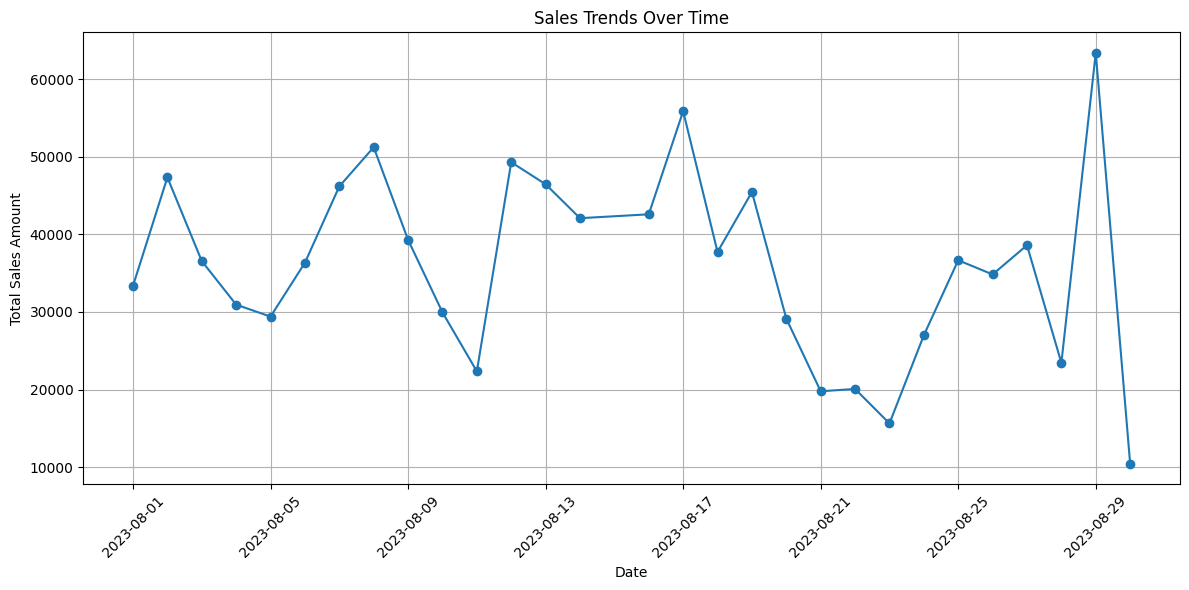

In [15]:
daily_sales = df.groupby('Date')['Amount'].sum()

# Plotting the sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd

# Assuming you have your data loaded into a DataFrame called 'df'
# Group the data by 'Item Details' and calculate the total quantity sold for each item
top_selling_items = df.groupby('Item Details')['Qty.'].sum().reset_index()

# Sort the items by total quantity sold in descending order to get the top sellers
top_selling_items = top_selling_items.sort_values(by='Qty.', ascending=False)

# Display the top-selling items
print("Top-Selling Items:")
print(top_selling_items.head())  # You can adjust the number of items to display by changing the argument to head()


Top-Selling Items:
    Item Details     Qty.
158    BRICK GBC  22593.0
156  BRICK A - N   6677.0
430        TILES   4335.0
159    BRICK MBF   1100.0
157  BRICK DHOOM    625.0


In [17]:
df['Unit'].value_counts()

Unit
Pcs.      1642
BAG        196
Kgs.       155
FEET        20
Metre       14
PACKET       9
LT           8
N.A.         4
Dozen        1
Name: count, dtype: int64

## Top-Selling Items

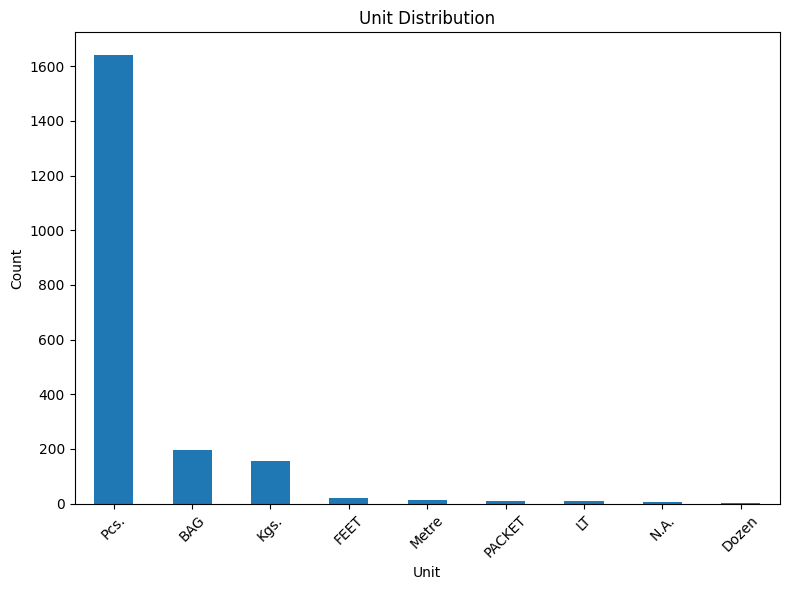

Top-Selling Items by Units:
    Item Details     Qty.
158    BRICK GBC  22593.0
156  BRICK A - N   6677.0
411        TILES   4335.0
159    BRICK MBF   1100.0
157  BRICK DHOOM    625.0


In [18]:
#Top selling Items
unit_counts = df['Unit'].value_counts()

# Visualize the value counts of units
plt.figure(figsize=(8, 6))
unit_counts.plot(kind='bar')
plt.title('Unit Distribution')
plt.xlabel('Unit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Select the top unit(s) based on your preference
top_units = ['Pcs.', 'BAG', 'Kgs.']  # You can adjust this list as needed

# Filter the dataset for the selected top unit(s)
top_selling_items = df[df['Unit'].isin(top_units)]

# Group the data by 'Item Details' and calculate the total quantity sold for each item
top_selling_items = top_selling_items.groupby('Item Details')['Qty.'].sum().reset_index()

# Sort the items by total quantity sold in descending order to get the top sellers
top_selling_items = top_selling_items.sort_values(by='Qty.', ascending=False)

# Display the top-selling items
print("Top-Selling Items by Units:")
print(top_selling_items.head())  # You can adjust the number of items to display by changing the argument to head()


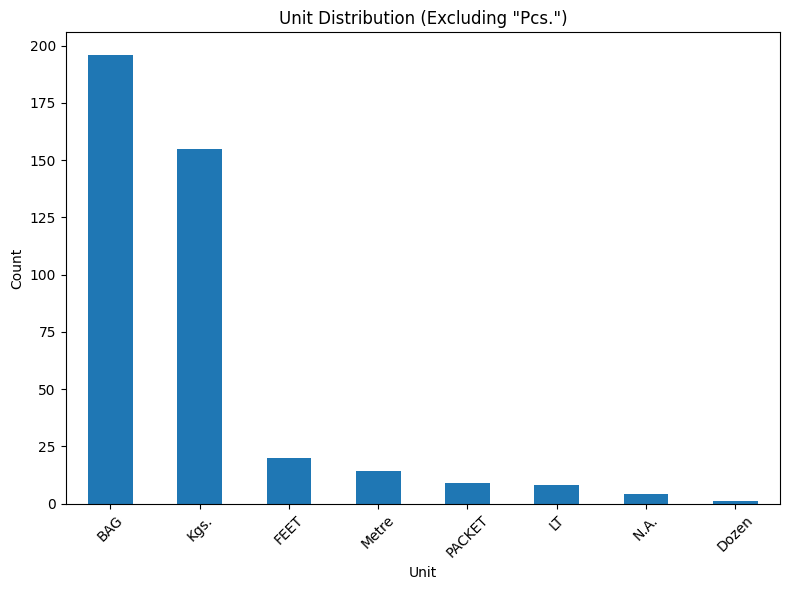

In [19]:
#Top Selling items excluding the pcs.
import pandas as pd
import matplotlib.pyplot as plt

unit_counts = df[df['Unit'] != 'Pcs.']['Unit'].value_counts()

# Visualizing the value counts of units excluding 'Pcs.'
plt.figure(figsize=(8, 6))
unit_counts.plot(kind='bar')
plt.title('Unit Distribution (Excluding "Pcs.")')
plt.xlabel('Unit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  

## Revenue Analysis

In [20]:
daily_revenue = df.groupby('Date')['Amount'].sum()
daily_revenue

Date
2023-08-01    33375.0
2023-08-02    47349.0
2023-08-03    36560.0
2023-08-04    30945.0
2023-08-05    29405.0
2023-08-06    36350.0
2023-08-07    46190.0
2023-08-08    51235.0
2023-08-09    39292.5
2023-08-10    29956.0
2023-08-11    22342.5
2023-08-12    49305.0
2023-08-13    46464.0
2023-08-14    42090.0
2023-08-16    42590.0
2023-08-17    55880.0
2023-08-18    37735.0
2023-08-19    45465.0
2023-08-20    29146.0
2023-08-21    19775.0
2023-08-22    20080.0
2023-08-23    15635.0
2023-08-24    26996.0
2023-08-25    36668.0
2023-08-26    34840.0
2023-08-27    38605.0
2023-08-28    23441.0
2023-08-29    63400.0
2023-08-30    10441.0
Name: Amount, dtype: float64

In [21]:
category_revenue = df.groupby('Item Details')['Amount'].sum().reset_index()
# Sorting the categories by total revenue in descending order
category_revenue = category_revenue.sort_values(by='Amount', ascending=False)

### Visualizing Revenue by Top 5 categories

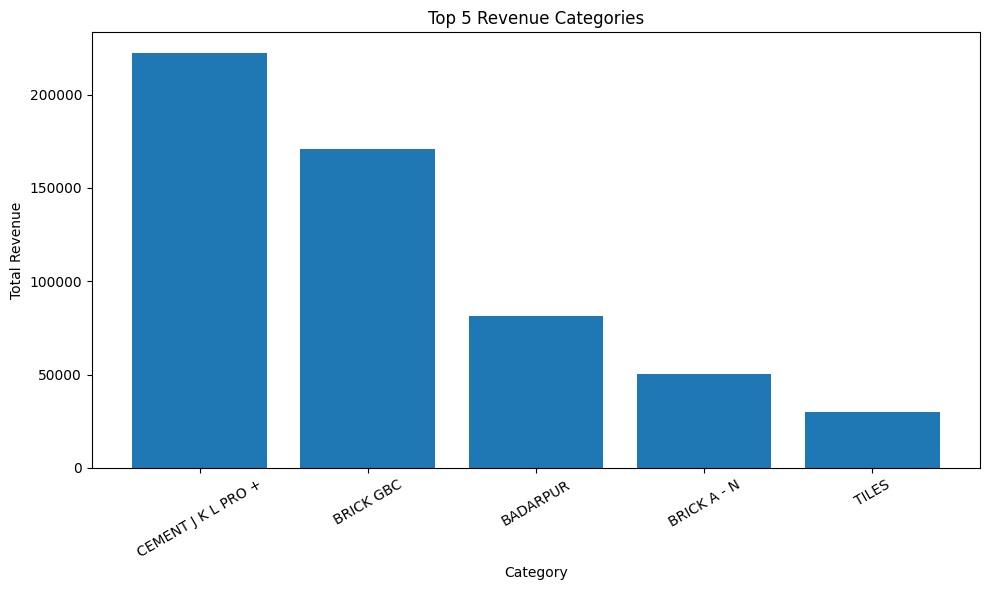

In [22]:
top_5_categories = category_revenue.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_categories['Item Details'], top_5_categories['Amount'])
plt.title('Top 5 Revenue Categories')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

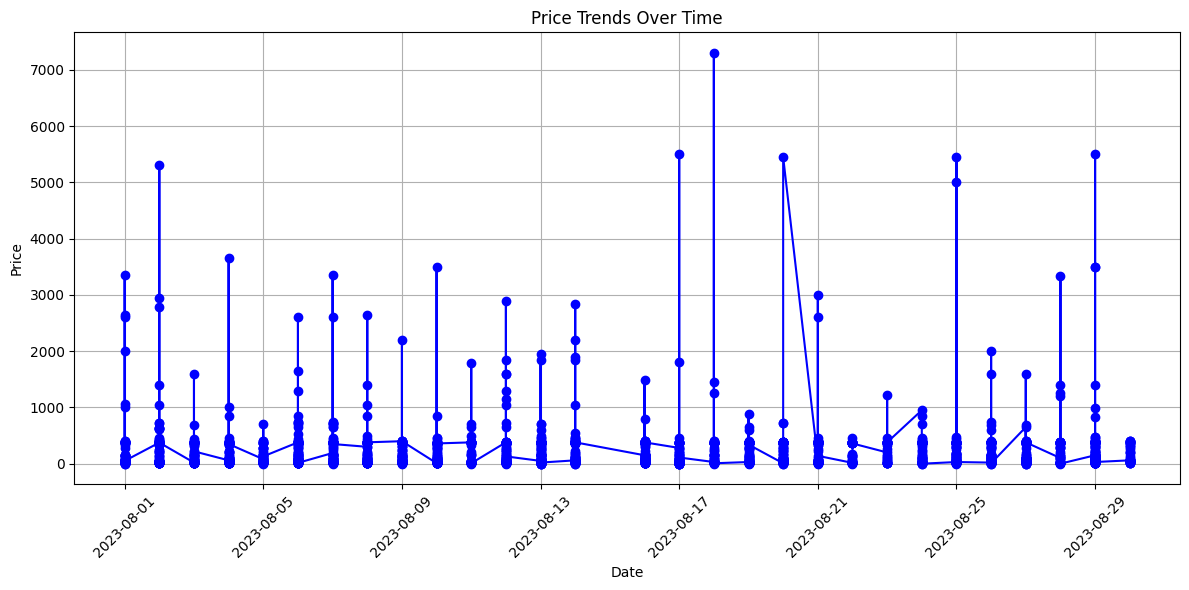

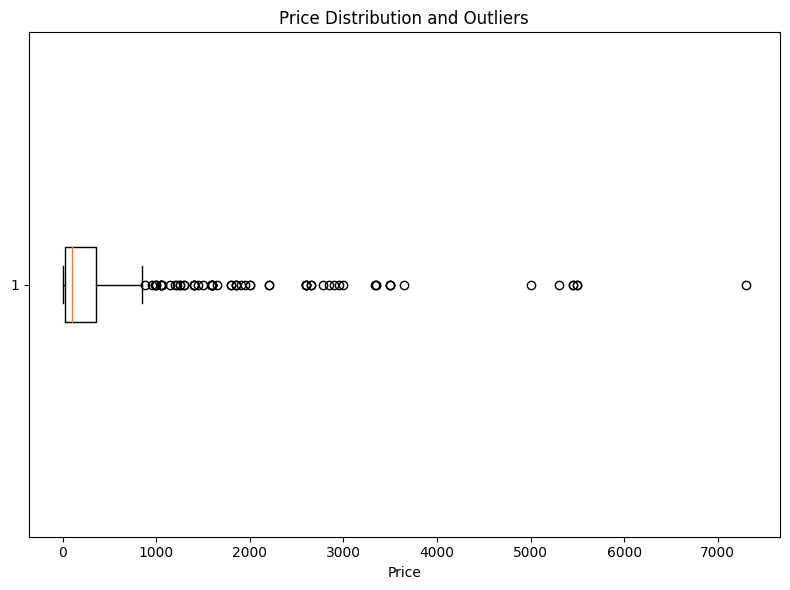

In [23]:
import matplotlib.pyplot as plt

# Create a line chart to visualize price trends over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', color='blue')
plt.title('Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a box plot to visualize price distribution and identify outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['Price'], vert=False)
plt.title('Price Distribution and Outliers')
plt.xlabel('Price')
plt.tight_layout()
plt.show()


In [24]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]


In [25]:
outliers

,Date,Item Details,Qty.,Unit,Price,Amount
4,2023-08-01,MACHINE COLOURENT,0.1,LT,1000.0,100.0
15,2023-08-01,TRACTOR EMUL WHITE 20LTR,1.0,Pcs.,2650.0,2650.0
51,2023-08-01,APCO ENAM BROWN 4LT,1.0,Pcs.,1060.0,1060.0
52,2023-08-01,TRACTOR EMUL SHYNE WHITE 20LT,1.0,Pcs.,3350.0,3350.0
54,2023-08-01,MACHINE COLOURENT,0.1,LT,2000.0,200.0
...,...,...,...,...,...,...
1911,2023-08-29,APEX SHYNE AY2 4LT,1.0,Pcs.,1400.0,1400.0
1917,2023-08-29,A C E SHYNE WHITE 20LT,1.0,Pcs.,3500.0,3500.0
1924,2023-08-29,TRUCARE METAL PRIMER 4LT,1.0,Pcs.,990.0,990.0
1941,2023-08-29,APEX SHYNE AY2 20LT,1.0,Pcs.,5500.0,5500.0


In [26]:
correlation_matrix = df[['Qty.', 'Price', 'Amount']].corr()
correlation_matrix

,Qty.,Price,Amount
Qty.,1.000000,-0.079798,0.620085
Price,-0.079798,1.000000,0.381838
Amount,0.620085,0.381838,1.000000


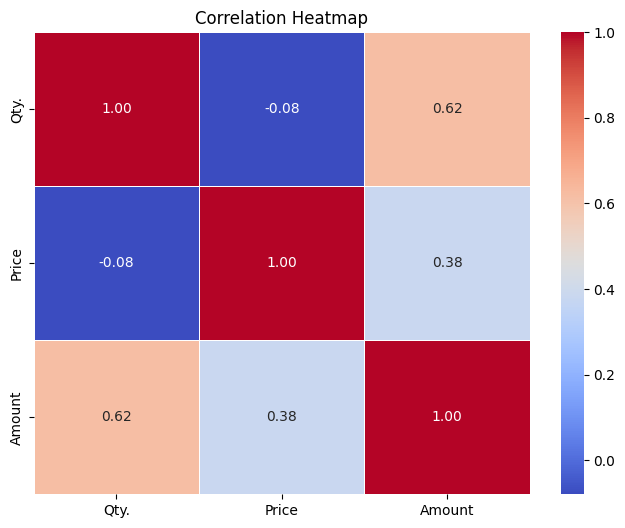

In [27]:
# Creating a correlation matrix
correlation_matrix = df[['Qty.', 'Price', 'Amount']].corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Qty. vs. Price
The correlation between 'Qty.' and 'Price' is approximately -0.079798, which indicates a weak negative correlation. This suggests that there's a slight tendency for the quantity sold ('Qty.') and the price of the item ('Price') to move in opposite directions, but the correlation is not strong.

### Qty. vs. Amount
The correlation between 'Qty.' and 'Amount' is approximately 0.620085, which indicates a moderate positive correlation. This means that there is a moderate tendency for the quantity sold ('Qty.') and the total sales amount ('Amount') to move together, with an increase in quantity sold associated with an increase in the total sales amount.

### Price vs. Amount
The correlation between 'Price' and 'Amount' is approximately 0.381838, indicating a moderate positive correlation. This means that there is a moderate tendency for the price of the item ('Price') and the total sales amount ('Amount') to move together, with an increase in price associated with an increase in the total sales amount.

These correlation coefficients provide insights into the relationships between the variables in the data.

In [28]:
# #Now visualising using Scatter matrix
# from pandas.plotting import scatter_matrix
# attributes = ['Qty.', 'Price', 'Amount']
# scatter_matrix(df[attributes], figsize=(12, 12))
# plt.show()


C:\Users\Keshav Sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


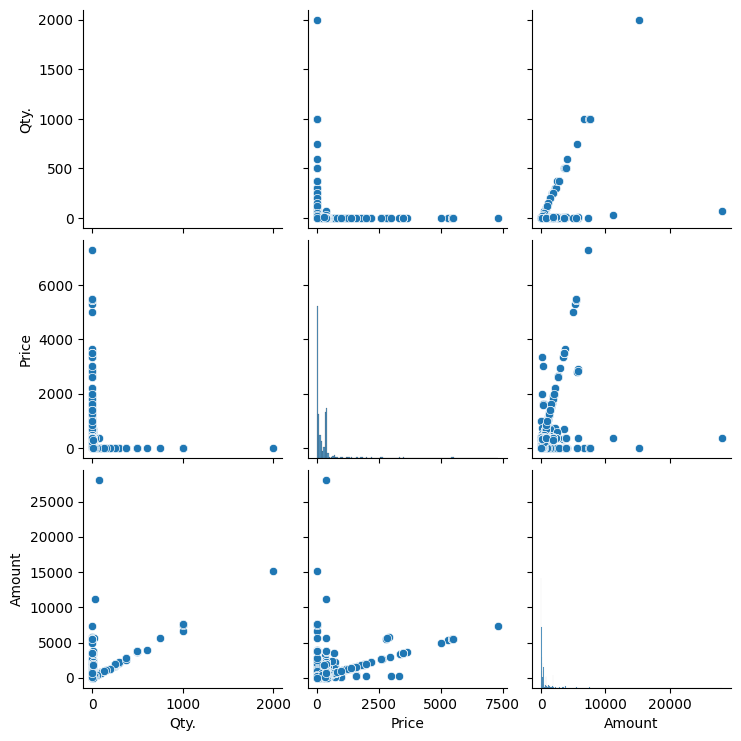

In [29]:
selected_columns = ['Qty.', 'Price', 'Amount']
selected_df = df[selected_columns]

scatter_matrix = sns.pairplot(selected_df)
plt.show()

In [30]:
df

,Date,Item Details,Qty.,Unit,Price,Amount
0,2023-08-01,PUTTY J K 20KG,6.0,Pcs.,380.00,2280.0
1,2023-08-01,TARPIN 1LT,3.0,Pcs.,130.00,390.0
2,2023-08-01,DHOTI,4.0,Pcs.,20.00,80.0
3,2023-08-01,"ROLLER FOAM ASIAN 6""",3.0,Pcs.,50.00,150.0
4,2023-08-01,MACHINE COLOURENT,0.1,LT,1000.00,100.0
...,...,...,...,...,...,...
2044,2023-08-30,RODI,1.0,Pcs.,380.00,380.0
2045,2023-08-30,RET,0.3,Pcs.,333.33,100.0
2046,2023-08-30,CEMENT J K L PRO +,2.0,BAG,380.00,760.0
2047,2023-08-30,BADARPUR,2.0,Pcs.,360.00,720.0


# Profitability Analysis assuming that profit margin is 20%

In [31]:
import pandas as pd

profit_margin = 0.20  # 20% profit margin
df['Profit'] = df['Amount'] * profit_margin

# Display the DataFrame with the calculated profit
print(df[['Item Details','Amount', 'Profit']])


              Item Details  Amount  Profit
0           PUTTY J K 20KG  2280.0   456.0
1               TARPIN 1LT   390.0    78.0
2                    DHOTI    80.0    16.0
3     ROLLER FOAM ASIAN 6"   150.0    30.0
4        MACHINE COLOURENT   100.0    20.0
...                    ...     ...     ...
2044                  RODI   380.0    76.0
2045                   RET   100.0    20.0
2046    CEMENT J K L PRO +   760.0   152.0
2047              BADARPUR   720.0   144.0
2048              BADARPUR  1800.0   360.0

[2049 rows x 3 columns]


In [32]:
profit_margin = 0.20  # 20% profit margin
df['Profit'] = df['Amount'] * profit_margin

# Display the DataFrame with the calculated profit column
df1=df 
df

,Date,Item Details,Qty.,Unit,Price,Amount,Profit
0,2023-08-01,PUTTY J K 20KG,6.0,Pcs.,380.00,2280.0,456.0
1,2023-08-01,TARPIN 1LT,3.0,Pcs.,130.00,390.0,78.0
2,2023-08-01,DHOTI,4.0,Pcs.,20.00,80.0,16.0
3,2023-08-01,"ROLLER FOAM ASIAN 6""",3.0,Pcs.,50.00,150.0,30.0
4,2023-08-01,MACHINE COLOURENT,0.1,LT,1000.00,100.0,20.0
...,...,...,...,...,...,...,...
2044,2023-08-30,RODI,1.0,Pcs.,380.00,380.0,76.0
2045,2023-08-30,RET,0.3,Pcs.,333.33,100.0,20.0
2046,2023-08-30,CEMENT J K L PRO +,2.0,BAG,380.00,760.0,152.0
2047,2023-08-30,BADARPUR,2.0,Pcs.,360.00,720.0,144.0


In [33]:
import pandas as pd

# Assuming df is your DataFrame with 'Amount' and 'Profit' columns
# Calculate cost as the difference between 'Amount' and 'Profit'
df['Cost'] = df['Amount'] - df['Profit']

# Display the updated DataFrame with the 'Cost' column
df

,Date,Item Details,Qty.,Unit,Price,Amount,Profit,Cost
0,2023-08-01,PUTTY J K 20KG,6.0,Pcs.,380.00,2280.0,456.0,1824.0
1,2023-08-01,TARPIN 1LT,3.0,Pcs.,130.00,390.0,78.0,312.0
2,2023-08-01,DHOTI,4.0,Pcs.,20.00,80.0,16.0,64.0
3,2023-08-01,"ROLLER FOAM ASIAN 6""",3.0,Pcs.,50.00,150.0,30.0,120.0
4,2023-08-01,MACHINE COLOURENT,0.1,LT,1000.00,100.0,20.0,80.0
...,...,...,...,...,...,...,...,...
2044,2023-08-30,RODI,1.0,Pcs.,380.00,380.0,76.0,304.0
2045,2023-08-30,RET,0.3,Pcs.,333.33,100.0,20.0,80.0
2046,2023-08-30,CEMENT J K L PRO +,2.0,BAG,380.00,760.0,152.0,608.0
2047,2023-08-30,BADARPUR,2.0,Pcs.,360.00,720.0,144.0,576.0


In [48]:
import pandas as pd

file_path = 'D:/ML/sales.csv' 


df1.to_csv(file_path) 


# Top 3 Most Profitable Items

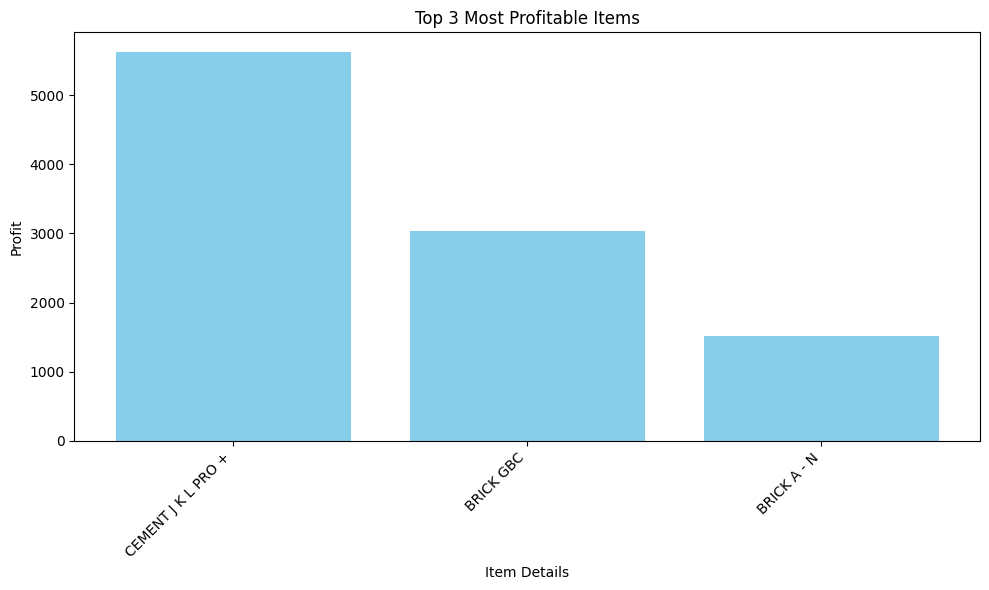

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Profit' and 'Item Details' columns
# Sort the DataFrame by 'Profit' in descending order and select the top 3 items
df_sorted_by_profit = df.sort_values(by='Profit', ascending=False)
top_3_profitable_items = df_sorted_by_profit.head(5)

# Create a bar chart to visualize the top 5 most profitable items
plt.figure(figsize=(10, 6))
plt.bar(top_3_profitable_items['Item Details'], top_3_profitable_items['Profit'], color='skyblue')
plt.xlabel('Item Details')
plt.ylabel('Profit')
plt.title('Top 3 Most Profitable Items')
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()


# EDA

In [35]:
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

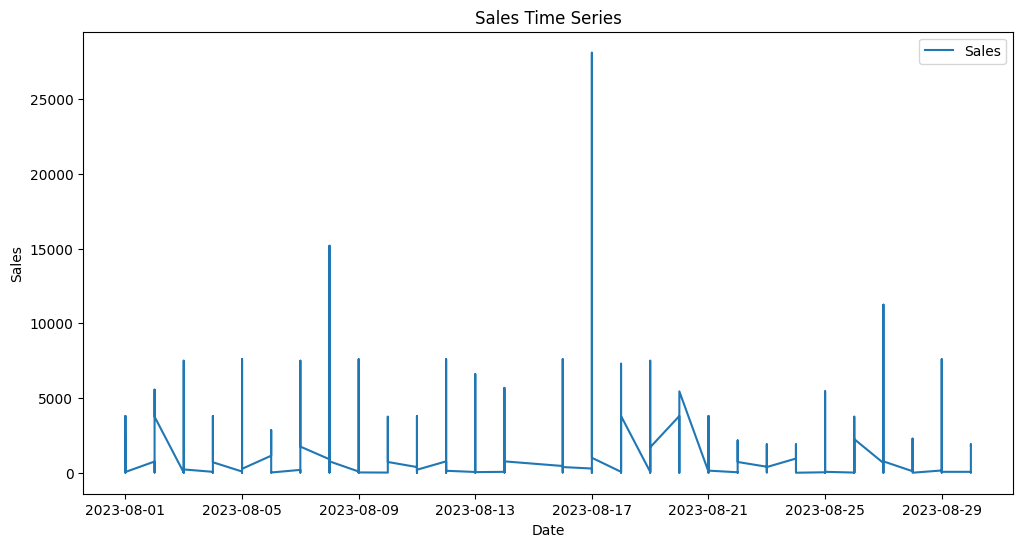

In [36]:
#Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Amount'], label='Sales')
plt.title('Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


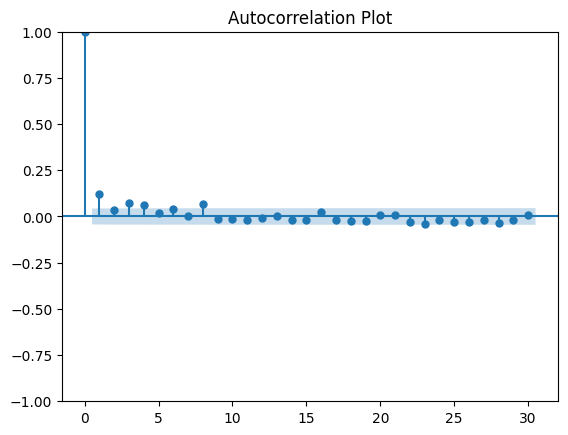

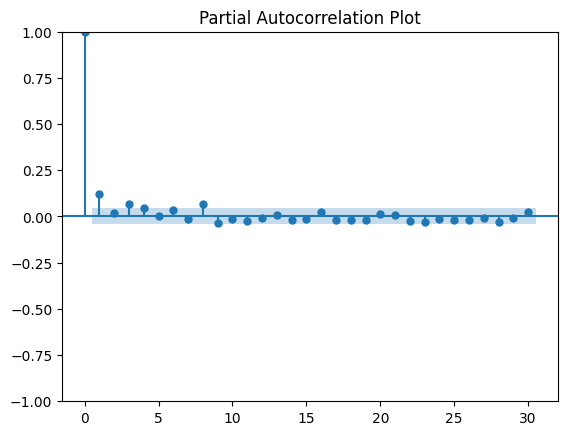

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plot
plot_acf(df['Amount'], lags=30)
plt.title('Autocorrelation Plot')
plt.show()

# Partial autocorrelation plot
plot_pacf(df['Amount'], lags=30)
plt.title('Partial Autocorrelation Plot')
plt.show()


# Regression Analysis

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [39]:
X = df[['Qty.', 'Price']]  # Independent variables
y = df['Profit']          # Dependent variable


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
model = DecisionTreeRegressor(random_state=42)  # You can adjust hyperparameters here
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [42]:
y_pred = model.predict(X_test)


In [43]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared (R²): {r2}')


MAE: 3.33110243902439
MSE: 843.3143127804879
R-squared (R²): 0.9781401345373244


In [44]:
df

,Item Details,Qty.,Unit,Price,Amount,Profit,Cost
Date,,,,,,,
2023-08-01,PUTTY J K 20KG,6.0,Pcs.,380.00,2280.0,456.0,1824.0
2023-08-01,TARPIN 1LT,3.0,Pcs.,130.00,390.0,78.0,312.0
2023-08-01,DHOTI,4.0,Pcs.,20.00,80.0,16.0,64.0
2023-08-01,"ROLLER FOAM ASIAN 6""",3.0,Pcs.,50.00,150.0,30.0,120.0
2023-08-01,MACHINE COLOURENT,0.1,LT,1000.00,100.0,20.0,80.0
...,...,...,...,...,...,...,...
2023-08-30,RODI,1.0,Pcs.,380.00,380.0,76.0,304.0
2023-08-30,RET,0.3,Pcs.,333.33,100.0,20.0,80.0
2023-08-30,CEMENT J K L PRO +,2.0,BAG,380.00,760.0,152.0,608.0


In [45]:
df

,Item Details,Qty.,Unit,Price,Amount,Profit,Cost
Date,,,,,,,
2023-08-01,PUTTY J K 20KG,6.0,Pcs.,380.00,2280.0,456.0,1824.0
2023-08-01,TARPIN 1LT,3.0,Pcs.,130.00,390.0,78.0,312.0
2023-08-01,DHOTI,4.0,Pcs.,20.00,80.0,16.0,64.0
2023-08-01,"ROLLER FOAM ASIAN 6""",3.0,Pcs.,50.00,150.0,30.0,120.0
2023-08-01,MACHINE COLOURENT,0.1,LT,1000.00,100.0,20.0,80.0
...,...,...,...,...,...,...,...
2023-08-30,RODI,1.0,Pcs.,380.00,380.0,76.0,304.0
2023-08-30,RET,0.3,Pcs.,333.33,100.0,20.0,80.0
2023-08-30,CEMENT J K L PRO +,2.0,BAG,380.00,760.0,152.0,608.0
